In [3]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import platform
import koreanize_matplotlib


In [4]:
def draw_two_plots(title, x_data, max_temp_list1, label_y1, max_temp_list2, label_y2):

    plt.rcParams['axes.unicode_minus'] =False
    plt.figure(figsize=(10,4))
    plt.plot(x_data, max_temp_list1, marker='s', markersize=6, color='b', label=label_y1)
    plt.plot(x_data, max_temp_list2, marker='s', markersize=6, color='r', label=label_y2)
    plt.xticks(x_data)

    plt.title(title)
    plt.legend()
    plt.show()

In [5]:
def main():
    search_month = int(input("비교할 월을 입력하세요 : "))
    
    weather_df= pd.read_csv('daegu-utf8-df.csv', encoding='utf-8-sig')
    weather_df['날짜']=pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')

    first_decade_max_temp_list =[0] * 10
    second_decade_max_temp_list= [0] * 10

    first_decade =1990
    second_decade=2010

    for year in range(10):
        first_decade_df = weather_df[(weather_df['날짜'].dt.year == first_decade + year) & (weather_df['날짜'].dt.month == search_month)]
        first_decade_max_temp_list[year] = round(first_decade_df['최고기온'].mean(), 1)

        second_decade_df = weather_df[(weather_df['날짜'].dt.year == second_decade + year) & (weather_df['날짜'].dt.month == search_month)]
        second_decade_max_temp_list[year] = round(second_decade_df['최고기온'].mean(), 1)

    print(f'{first_decade}년대 {search_month}월 최고 기운 평균: {first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기운 평균: {second_decade_max_temp_list}')
    
    first_decade_high_temp_mean = round(sum(first_decade_max_temp_list)/ len(first_decade_max_temp_list), 1)

    second_decade_high_temp_mean = round(sum(second_decade_max_temp_list)/ len(second_decade_max_temp_list), 1)

    print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균 : {first_decade_high_temp_mean}')
    print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균: {second_decade_high_temp_mean}')

    x_data = [ i for i in range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교', x_data, first_decade_max_temp_list, str(first_decade)+'년대',second_decade_max_temp_list, str(second_decade)+'년대')

1990년대 12월 최고 기운 평균: [9.0, 9.8, 8.6, 8.0, 9.4, 7.5, 9.3, 8.3, 10.2, 8.0]
2010년대 12월 최고 기운 평균: [7.3, 6.9, 3.9, 8.1, 5.8, 9.0, 8.7, 5.8, 7.0, 9.0]
1990년대 12월 전체 최고 기온 평균 : 8.8
2010년대 12월 전체 최고 기온 평균: 7.2


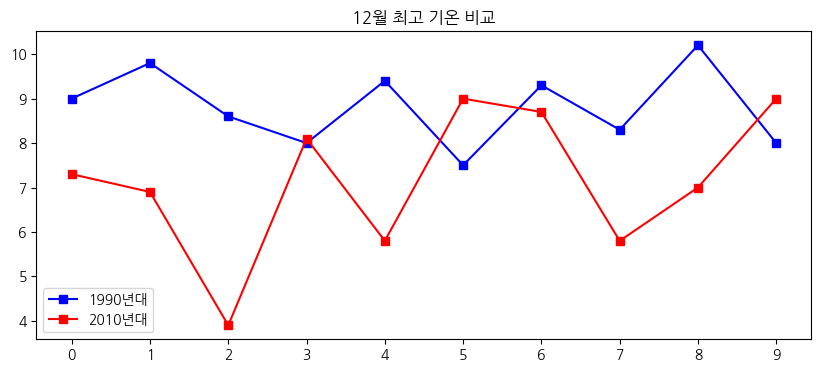

In [6]:
main()